<a href="https://colab.research.google.com/github/tjsiledar/Machine-Learning/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files
files.upload()

Saving ex2data1.txt to ex2data1.txt


{'ex2data1.txt': b'34.62365962451697,78.0246928153624,0\n30.28671076822607,43.89499752400101,0\n35.84740876993872,72.90219802708364,0\n60.18259938620976,86.30855209546826,1\n79.0327360507101,75.3443764369103,1\n45.08327747668339,56.3163717815305,0\n61.10666453684766,96.51142588489624,1\n75.02474556738889,46.55401354116538,1\n76.09878670226257,87.42056971926803,1\n84.43281996120035,43.53339331072109,1\n95.86155507093572,38.22527805795094,0\n75.01365838958247,30.60326323428011,0\n82.30705337399482,76.48196330235604,1\n69.36458875970939,97.71869196188608,1\n39.53833914367223,76.03681085115882,0\n53.9710521485623,89.20735013750205,1\n69.07014406283025,52.74046973016765,1\n67.94685547711617,46.67857410673128,0\n70.66150955499435,92.92713789364831,1\n76.97878372747498,47.57596364975532,1\n67.37202754570876,42.83843832029179,0\n89.67677575072079,65.79936592745237,1\n50.534788289883,48.85581152764205,0\n34.21206097786789,44.20952859866288,0\n77.9240914545704,68.9723599933059,1\n62.271013670046

In [0]:
data = pd.read_csv("ex2data1.txt", names = ["Exam1", "Exam2", "Admitted"])

In [0]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [0]:
positive = data[data["Admitted"].isin([1])]
negative = data[data["Admitted"].isin([0])]

In [0]:
positive.head()

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


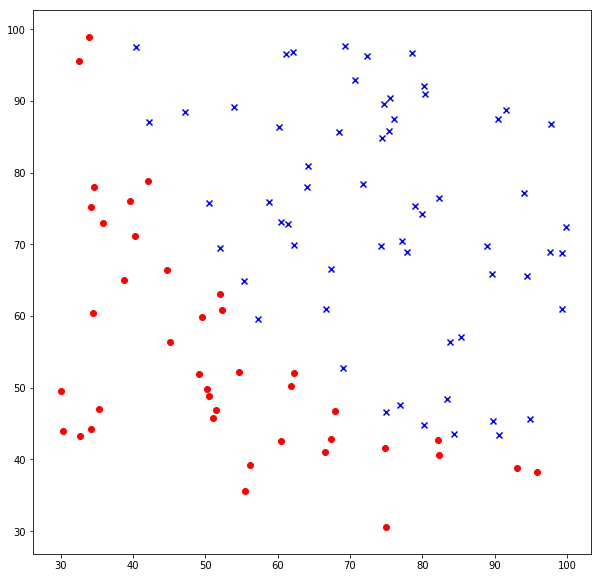

In [0]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(positive["Exam1"],positive["Exam2"], c="b", marker="x" , label="Admitted")
ax.scatter(negative["Exam1"],negative["Exam2"], c="r", marker="o" , label="Not Admitted")

In [0]:
data.insert(0,"Ones", 1)

In [0]:
data.head()

,Ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [0]:
X = data.values[:,0:3]

In [0]:
m,n = X.shape

In [0]:
initial_theta = np.zeros(n)

In [0]:
initial_theta

array([0., 0., 0.])

In [0]:
y = data.values[:,-1]

In [0]:
y=y.reshape(y.shape[0],1)
y.shape

(100, 1)

In [0]:
def sigmoid(Z):
  return 1/(1+np.exp(-Z))

In [0]:
def costFunction(theta,X,y):
  m,n = X.shape
  theta = theta.reshape(n,1)
  a = sigmoid(np.dot(X,theta))
  f = np.multiply(y,np.log(a))
  s = np.multiply(1-y,np.log(1-a))
  
  J = -np.sum(f+s)/m
  grad = (1/m)*np.dot(X.T,a-y)
  
  #print("shape of theta is : " + str(theta.shape))
  #print("shape of grad is :" + str(grad.shape))
  return J,grad

In [0]:
costFunction(initial_theta,X,y)

shape of theta is : (3, 1)
shape of grad is :(3, 1)


(0.6931471805599453, array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

In [0]:
def gradient(theta,X,y):
  m = len(y)
  
  a = sigmoid(np.dot(X,theta))
  
  grad = (1/m)*np.dot(X.T,a-y)
  print("shape of grad is :" + str(grad.shape))
  return grad

In [0]:
grad = gradient(initial_theta, X, y)

shape of grad is :(3, 1)


In [0]:
grad.shape

(3, 1)

In [0]:
import scipy.optimize as opt

In [0]:
final_theta = opt.fmin_tnc(func=costFunction, x0=initial_theta, args=(X,y))

In [0]:
final_theta[0]

array([-25.16131865,   0.20623159,   0.20147149])

In [0]:
costFunction(final_theta[0],X,y)

(0.2034977015894744, array([[9.50184421e-09],
        [1.30547958e-07],
        [4.97057099e-07]]))

In [0]:
def predict(theta,X):
  m = X.shape[0]
  p = sigmoid(np.dot(X,theta)).round()
  p = p.reshape(m,1)
  return p

In [0]:
p = predict(final_theta[0],X)

In [0]:
np.mean(p==y)*100

89.0